In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library
import pandas as pd

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset collection/sleep Quality.csv")
df.drop('Person ID', axis=1, inplace=True)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Preprocess 'Blood Pressure' column
df['Systolic Pressure'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic Pressure'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))
df.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
# One-Hot Encoding for categorical columns
data_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns.drop('Sleep Disorder'))

In [ ]:
data_encoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,None,126,83,...,0,0,0,0,1,0,0,0,0,1
1,28,6.2,6,60,8,75,10000,None,125,80,...,0,0,0,0,0,0,1,0,0,0
2,28,6.2,6,60,8,75,10000,None,125,80,...,0,0,0,0,0,0,1,0,0,0
3,28,5.9,4,30,8,85,3000,Sleep Apnea,140,90,...,0,1,0,0,0,0,0,0,1,0
4,28,5.9,4,30,8,85,3000,Sleep Apnea,140,90,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Label Encoding for target column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_encoded['Sleep Disorder'] = label_encoder.fit_transform(data_encoded['Sleep Disorder'])

In [ ]:
data_encoded.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,1,126,83,...,0,0,0,0,1,0,0,0,0,1
1,28,6.2,6,60,8,75,10000,1,125,80,...,0,0,0,0,0,0,1,0,0,0
2,28,6.2,6,60,8,75,10000,1,125,80,...,0,0,0,0,0,0,1,0,0,0
3,28,5.9,4,30,8,85,3000,2,140,90,...,0,1,0,0,0,0,0,0,1,0
4,28,5.9,4,30,8,85,3000,2,140,90,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Split data into features (X) and target (y)
X = data_encoded.drop(columns=['Sleep Disorder'])
y = data_encoded['Sleep Disorder']

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
#Split data train testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#Training model with Logistic Regression
model_lr = LogisticRegression(class_weight='balanced', random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluates the performance of the given model using various metrics.

    Parameters:
    model (object): Trained machine learning model
    X_test (array-like): Testing features
    y_test (array-like): True labels for testing data

    Returns:
    dict: A dictionary containing evaluation metrics
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovr')

    evaluation_metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC-ROC Score": auc_roc
    }

    return evaluation_metrics

In [ ]:
evaluation_results = evaluate_model_performance(model_lr, X_test, y_test)
print("Evaluation results for Logistic Regression Model:")
for metric, value in evaluation_results.items():
  print(f"{metric}: {value}")

Evaluation results for Logistic Regression Model:
Accuracy: 0.9333333333333333
Precision: 0.943672514619883
Recall: 0.9333333333333333
F1-score: 0.9351195445920303
AUC-ROC Score: 0.983781058258915


In [ ]:
#Evaluasi kepentingan fitur
feature_importance = model_lr.coef_[0]

# Cetak kepentingan fitur
for i, feature in enumerate(X_scaled_df.columns):
    print(f"{feature}: {feature_importance[i]}")

Age: 0.5071351772042944
Sleep Duration: -1.206060900176208
Quality of Sleep: -0.4131284961563838
Physical Activity Level: -0.40393874195466817
Stress Level: -0.11009779598274612
Heart Rate: -0.8068250510211334
Daily Steps: -0.26737973784226465
Systolic Pressure: 1.0090533182033865
Diastolic Pressure: 0.821748003428129
Gender_Female: -0.11067573796924567
Gender_Male: 0.111058580827199
Occupation_Accountant: 1.0294416944530016
Occupation_Doctor: -0.2548341980233861
Occupation_Engineer: 0.5756981011075553
Occupation_Lawyer: -0.20685679285130595
Occupation_Manager: -0.1367515327403719
Occupation_Nurse: -1.4596968546804747
Occupation_Sales Representative: -0.7490107615441272
Occupation_Salesperson: 1.1381499352996172
Occupation_Scientist: -0.6920880789010767
Occupation_Software Engineer: 0.15237418541258008
Occupation_Teacher: 0.6039571453259442
BMI Category_Normal: -0.38503928318970343
BMI Category_Normal Weight: 0.22904489792041496
BMI Category_Obese: 0.07487147119560032
BMI Category_Over

Dari hasil tersebut, fitur-fitur dengan koefisien yang memiliki nilai absolut yang lebih besar cenderung memiliki pengaruh yang lebih signifikan dalam memprediksi gangguan tidur. Berikut adalah fitur-fitur yang memiliki koefisien yang signifikan:

Usia (Age) Durasi Tidur (Sleep Duration) Kategori BMI (BMI Category) Tekanan Darah Sistolik (Systolic_BP) Tekanan Darah Diastolik (Diastolic_BP) Pekerjaan (Occupation), seperti Accountant, Nurse, dan Salesperson Dari sini, kita dapat menyimpulkan bahwa usia, durasi tidur, kategori BMI, tekanan darah, dan pekerjaan (terutama Akuntan, Perawat, dan Salesperson)

In [ ]:
#Buat model Logistic regression menggunakan fitur berdasarkan hasil evaluasi fitur
selected_features = ['Age', 'Sleep Duration', 'BMI Category_Normal', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Systolic Pressure', 'Diastolic Pressure','Occupation_Accountant', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher']

X_selected = X_scaled_df[selected_features]

In [ ]:
#Train split data pada feature yang terpilih
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#Inisialisasi dan latih model Logistic Regression  dengan feature terpilih:
model_new = LogisticRegression(class_weight='balanced', random_state=42)
model_new.fit(X_train_new, y_train_new)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
evaluation_results = evaluate_model_performance(model_new, X_test_new, y_test_new)
print("Evaluation results for Logistic Regression Model With new features:")
for metric, value in evaluation_results.items():
  print(f"{metric}: {value}")

Evaluation results for Logistic Regression Model With new features:
Accuracy: 0.9466666666666667
Precision: 0.9533333333333334
Recall: 0.9466666666666667
F1-score: 0.9477789661319073
AUC-ROC Score: 0.9793057529919201


Prediksi gangguan tidur dengan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
model_dt = DecisionTreeClassifier(random_state=42)

# Latih model dengan data pelatihan yang telah diresampling
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
evaluation_results = evaluate_model_performance(model_dt, X_test, y_test)
print("Evaluation results for Decision Tree:")
for metric, value in evaluation_results.items():
  print(f"{metric}: {value}")

Evaluation results for Decision Tree:
Accuracy: 0.9466666666666667
Precision: 0.9524444444444445
Recall: 0.9466666666666667
F1-score: 0.9475296096751462
AUC-ROC Score: 0.9588246765081101


Hasil di atas merupakan hasil pengukuran kinerja model prediksi menggunakan decison tree. pada model di atas semua feature di dataset dimasukkan. Pada decision tree, ada beberapa cara untuk menentukan fitur yang paling berpengaruh dalam model Decision Tree yaitu Menggunakan Fitur Importance dan Recursive Feature Elimination (RFE). Pada tulisan ini akan digunakan teknik RFE karena teknik ini menghilangkan fitur satu per satu dan membangun model pada fitur yang tersisa untuk mengevaluasi kinerja. Dengan cara ini, kita dapat menentukan fitur yang paling penting dengan melihat perubahan dalam kinerja model saat fitur dihilangkan.

In [ ]:
from sklearn.feature_selection import RFE

# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Inisialisasi RFE dengan model Decision Tree dan jumlah fitur yang ingin dipertahankan
rfe = RFE(model, n_features_to_select=6)

# Melatih RFE pada data
rfe.fit(X_train, y_train)

# Mendapatkan indeks fitur yang dipilih
selected_features = rfe.support_

# Menampilkan fitur yang dipilih
selected_feature_names = X.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['Age', 'Sleep Duration', 'Daily Steps', 'Systolic Pressure',
       'Gender_Female', 'BMI Category_Overweight'],
      dtype='object')


In [ ]:
#generating new decision tree model based on new feature
RFE_features = ['Age', 'Sleep Duration', 'Daily Steps', 'Systolic Pressure', 'Gender_Female', 'BMI Category_Overweight']

# Memisahkan data menjadi fitur dan target
X_RFE_selected = X_scaled_df[RFE_features]

y_new = data_encoded['Sleep Disorder']

In [ ]:
#train split data
X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(X_RFE_selected, y_new, test_size=0.2, stratify=y_new, random_state=42)

In [ ]:
#insisalisasi model dengan feature RFE
new_model_dt = DecisionTreeClassifier(random_state=42)

# Latih model dengan data pelatihan yang telah diresampling
new_model_dt.fit(X_train_RFE, y_train_RFE)

DecisionTreeClassifier(random_state=42)

In [ ]:
evaluation_results = evaluate_model_performance(new_model_dt, X_test_RFE, y_test_RFE)
print("Evaluation results for Decision Tree with new features:")
for metric, value in evaluation_results.items():
  print(f"{metric}: {value}")

Evaluation results for Decision Tree with new features:
Accuracy: 0.9466666666666667
Precision: 0.9466666666666667
Recall: 0.9466666666666667
F1-score: 0.9466666666666667
AUC-ROC Score: 0.9687815442561206


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#inisialisasi model
model_gb = GradientBoostingClassifier(random_state=42)

In [ ]:
#training model
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
evaluation_results = evaluate_model_performance(model_gb, X_test, y_test)
print("Evaluation results for Gradient Bossting:")
for metric, value in evaluation_results.items():
  print(f"{metric}: {value}")

Evaluation results for Gradient Bossting:
Accuracy: 0.96
Precision: 0.962248366013072
Recall: 0.96
F1-score: 0.9601115436905203
AUC-ROC Score: 0.9941732580037664


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
#Mengetahui feature yang penting pada model classifier
import shap
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

In [ ]:
#menyimpan nama features yang ada di dataset
feature_names = X_scaled_df.columns.tolist()

Age: 0.17496593535994504
Sleep Duration: 0.0016610322412815267
Quality of Sleep: 0.005987600354144993
Physical Activity Level: 0.009674547931316863
Stress Level: 0.0016501033285848622
Heart Rate: 0.0010313546977140224
Daily Steps: 0.0028216975012270136
Systolic Pressure: 0.0029358361374863307
Diastolic Pressure: 0.010659630906870702
Gender_Female: 0.04244145582119158
Gender_Male: 0.01640013513930321
Occupation_Accountant: 0.0032281496795247082
Occupation_Doctor: 0.002087373276834659
Occupation_Engineer: 0.008222344348173947
Occupation_Lawyer: 0.0024307770802282705
Occupation_Manager: 0.007132163021149476
Occupation_Nurse: 0.006497252949855665
Occupation_Sales Representative: 0.0026242892165553
Occupation_Salesperson: 0.004885885423114905
Occupation_Scientist: 0.006123125157573215
Occupation_Software Engineer: 0.006178035825765604
Occupation_Teacher: 0.0057164921516960855
BMI Category_Normal: 0.6497962438505521
BMI Category_Normal Weight: 0.007798340844533976
BMI Category_Obese: 0.00406

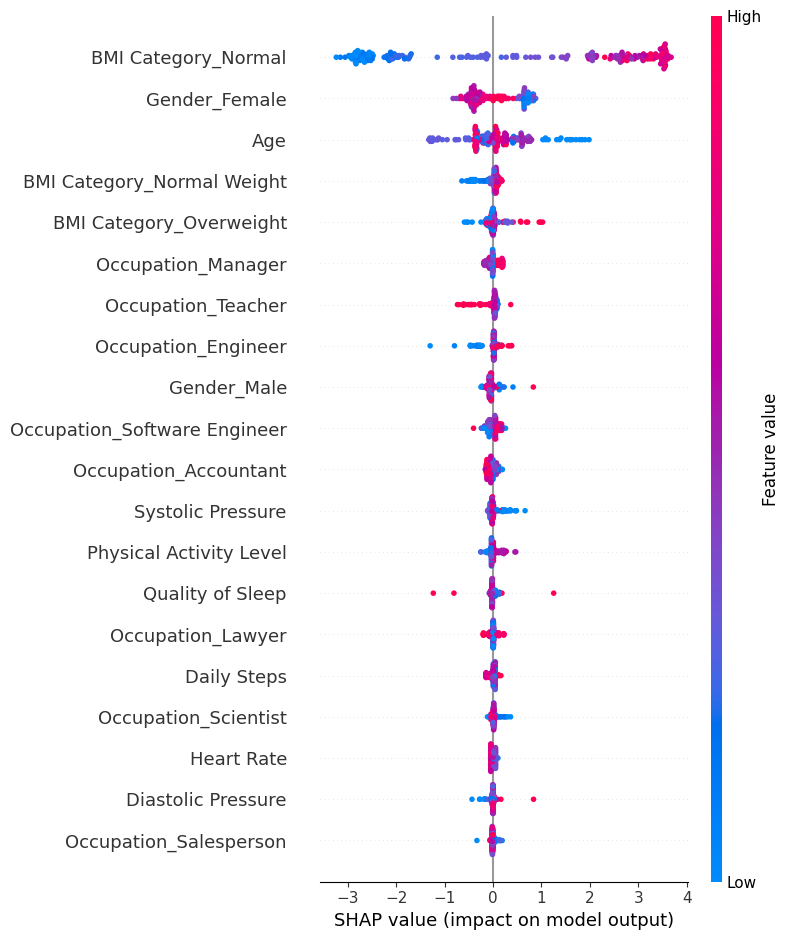

In [ ]:
# Buat dataset dummy untuk contoh
X_scaled, y = make_classification(n_samples=1000, n_features=26, random_state=42)

# Simpan nama fitur
feature_names = X_scaled_df.columns.tolist()

# Buat DataFrame dari dataset
X_df = pd.DataFrame(X_scaled, columns=feature_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, stratify=y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Gradient Boosting
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

# Hitung feature importance
feature_importance_gb = model_gb.feature_importances_

# Cetak skor feature importance untuk setiap fitur
for i, importance in enumerate(feature_importance_gb):
    print(f"{feature_names[i]}: {importance}")

# Hitung SHAP values
explainer = shap.Explainer(model_gb, X_train)
shap_values = explainer.shap_values(X_test)

# Plot summary plot SHAP values
shap.summary_plot(shap_values, X_test, feature_names=feature_names)